## 1: Import Required Libraries

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Settings
import warnings
warnings.filterwarnings('ignore')


## 2: Load and Explore Dataset

In [3]:
df = pd.read_csv('Loan_Default.csv')
print("Shape:", df.shape)
df.head()

Shape: (148670, 34)


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [5]:
# Basic info
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

## 3: Data Cleaning

In [8]:
# Drop ID column if it has no predictive value
df.drop(columns=['ID'], inplace=True, errors='ignore')

In [10]:
# Check missing values
missing = df.isnull().sum()
print("Missing columns:\n", missing[missing > 0])


Missing columns:
 loan_limit                    3344
approv_in_adv                  908
loan_purpose                   134
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
property_value               15098
income                        9150
age                            200
submission_of_application      200
LTV                          15098
dtir1                        24121
dtype: int64


In [12]:
# Fill missing numeric values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill missing categorical values with mode (if any)
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [14]:
# Encode all object-type columns using LabelEncoder
label_encoders = {}
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [15]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       148670 non-null  int64  
 1   loan_limit                 148670 non-null  int32  
 2   Gender                     148670 non-null  int32  
 3   approv_in_adv              148670 non-null  int32  
 4   loan_type                  148670 non-null  int32  
 5   loan_purpose               148670 non-null  int32  
 6   Credit_Worthiness          148670 non-null  int32  
 7   open_credit                148670 non-null  int32  
 8   business_or_commercial     148670 non-null  int32  
 9   loan_amount                148670 non-null  int64  
 10  rate_of_interest           148670 non-null  float64
 11  Interest_rate_spread       148670 non-null  float64
 12  Upfront_charges            148670 non-null  float64
 13  term                       14

In [18]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv("Loan_Default_Cleaned.csv", index=False)
print("Cleaned dataset saved as 'Loan_Default_Cleaned.csv'")


Cleaned dataset saved as 'Loan_Default_Cleaned.csv'


## 4: Exploratory Data Analysis (EDA)

### 4.1: Dataset Overview

In [58]:
df.shape
df.info()
df.describe()
df.isnull().sum()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       148670 non-null  int64  
 1   loan_limit                 148670 non-null  int32  
 2   Gender                     148670 non-null  int32  
 3   approv_in_adv              148670 non-null  int32  
 4   loan_type                  148670 non-null  int32  
 5   loan_purpose               148670 non-null  int32  
 6   Credit_Worthiness          148670 non-null  int32  
 7   open_credit                148670 non-null  int32  
 8   business_or_commercial     148670 non-null  int32  
 9   loan_amount                148670 non-null  int64  
 10  rate_of_interest           148670 non-null  float64
 11  Interest_rate_spread       148670 non-null  float64
 12  Upfront_charges            148670 non-null  float64
 13  term                       14

year                             1
loan_limit                       2
Gender                           4
approv_in_adv                    2
loan_type                        3
loan_purpose                     4
Credit_Worthiness                2
open_credit                      2
business_or_commercial           2
loan_amount                    211
rate_of_interest               131
Interest_rate_spread         22516
Upfront_charges              58272
term                            26
Neg_ammortization                2
interest_only                    2
lump_sum_payment                 2
property_value                 385
construction_type                2
occupancy_type                   3
Secured_by                       2
total_units                      4
income                        1001
credit_type                      4
Credit_Score                   401
co-applicant_credit_type         2
age                              7
submission_of_application        2
LTV                 

### 4.2: Target Distribution

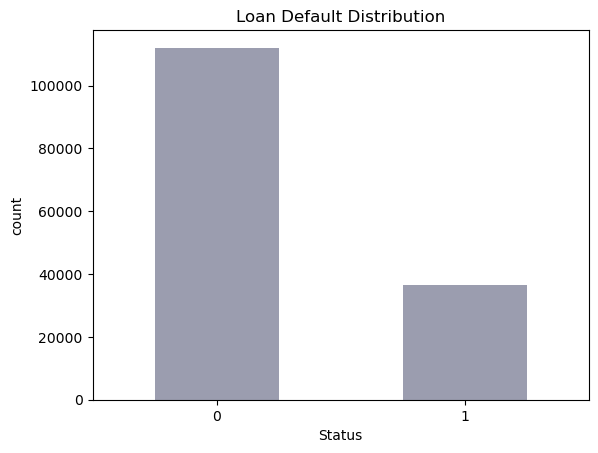

In [56]:
sns.countplot(data=df, x='Status', color="#989AB2", width=0.5)
plt.title("Loan Default Distribution")
plt.show()

**Insight:** The dataset is slightly imbalanced, with more non-default (0) than default (1) records, which may affect model training.


### 4.3: Correlation Matrix

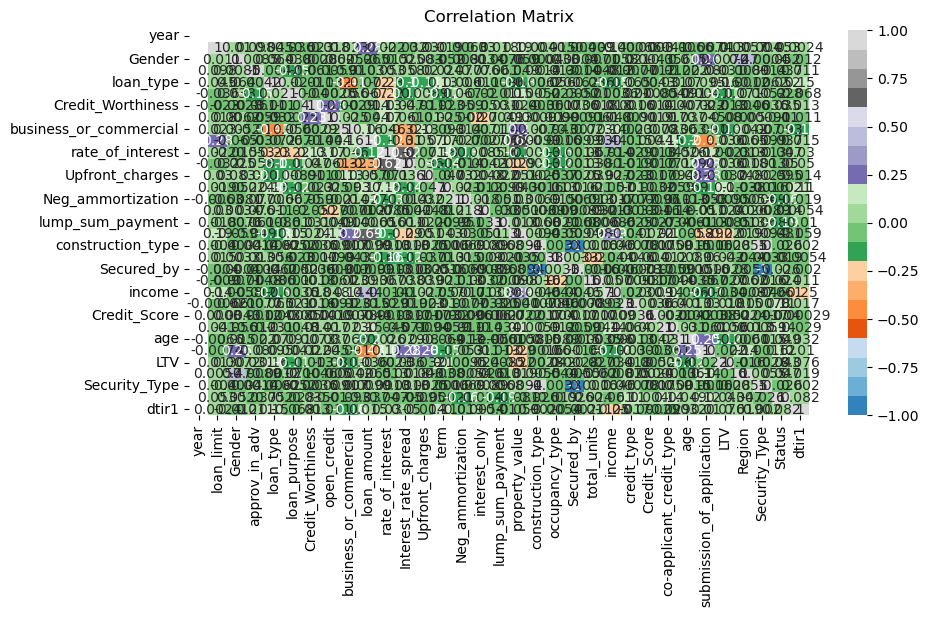

In [194]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='tab20c')
plt.title("Correlation Matrix")
plt.show()

**Insight:** Credit_Worthiness, loan_purpose, and interest_only have noticeable correlation with loan default, suggesting predictive potential.


### 4.4: Important Categorical Feature Distribution

In [104]:
# Select the most relevant categorical columns
important_cols = [
    'loan_purpose',
    'Credit_Worthiness',
    'loan_limit',
    'interest_only',
    'Gender',
    'business_or_commercial',
    'construction_type',
    'occupancy_type'
]

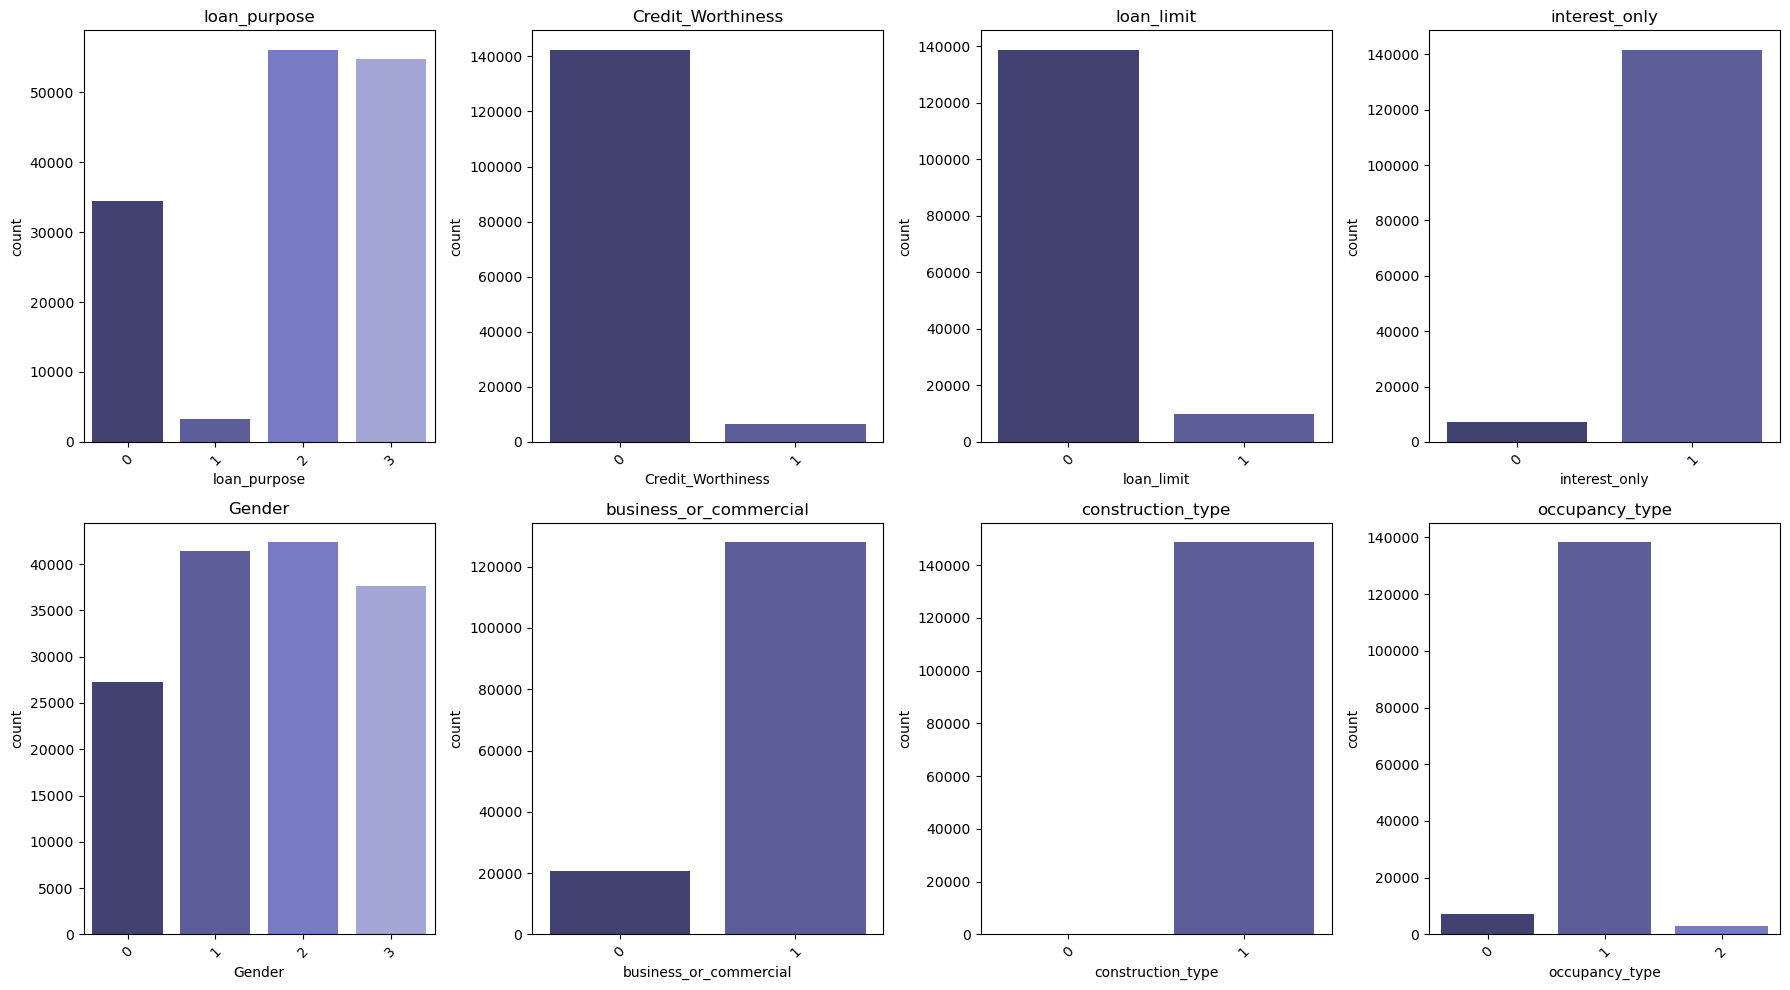

In [108]:
plt.figure(figsize=(18, 10)) 
for i, col in enumerate(important_cols, 1):
    plt.subplot(2, 4, i)
    sns.countplot(data=df, x=col, palette='tab20b')
    plt.title(f"{col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- **loan_purpose:** Most loans are for home purchases, but loans for business purposes tend to appear riskier.
- **Credit_Worthiness:** A poor credit history is highly common among defaulting applicants.
- **loan_limit:** Most applicants fall under conforming loan limits, but default rates vary slightly by loan size.
- **interest_only:** Interest-only loans are visibly riskier, with more defaults linked to them.
- **Gender:** The dataset has more male applicants, but gender does not show a major influence on default.
- **business_or_commercial:** Business/commercial loans are more likely to default than personal-use loans.
- **construction_type:** Construction type does not show a strong pattern with default.
- **occupancy_type:** Owner-occupied homes show fewer defaults compared to investment/rental prperties.


## 5: Preprocessing

### 5.1: Encoding Categorical Columns

In [125]:
df_encoded = df.copy()
le = LabelEncoder()
for col in categorical:
    df_encoded[col] = le.fit_transform(df_encoded[col])
df_encoded.head() #to verify  

,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,2019,0,3,0,0,0,0,0,1,116500,...,3,758,0,0,1,98.728814,3,1,1,45.0
1,2019,0,2,0,1,0,0,0,0,206500,...,2,552,1,3,1,75.135870,0,1,1,39.0
2,2019,0,2,1,0,0,0,0,1,406500,...,3,834,0,1,1,80.019685,3,1,0,46.0
3,2019,0,2,0,0,3,0,0,1,456500,...,3,587,0,2,0,69.376900,0,1,0,42.0
4,2019,0,1,1,0,0,0,0,1,696500,...,1,602,1,0,0,91.886544,0,1,0,39.0


### Insight: Label Encoding
Categorical variables were encoded into numeric values using Label Encoding to make them suitable for machine learning models, which only accept numerical inputs. This ensures that features like gender, loan purpose, and credit worthiness can be interpreted by the model.

### 5.2 Train-Test Split

In [136]:
X = df_encoded.drop('Status', axis=1)  
y = df_encoded['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (118936, 32)
Test shape: (29734, 32)


### Insight: Train-Test Split

The dataset was split into 80% training and 20% testing sets to evaluate model performance on unseen data. This step helps prevent overfitting and ensures the model generalizes well to new case.


### 5.3: Feature Scaling

In [138]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled training data shape:", X_train_scaled.shape)

Scaled training data shape: (118936, 32)


### Insight: Feature Scaling
StandardScaler was applied to normalize the feature values so that they have a mean of 0 and standard deviation of 1. This step is essential for distance-based models like Logistic Regression and SVM to perform accurately and fairly across all features.

## 6: Machine Learning Model Building

### 6.1: Logistic Regression

In [153]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7811596152552633

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87     22494
           1       0.63      0.25      0.35      7240

    accuracy                           0.78     29734
   macro avg       0.71      0.60      0.61     29734
weighted avg       0.76      0.78      0.74     29734



**Insight:** Logistic Regression gives a good baseline with moderate accuracy, benefiting from feature scaling.


### 6.2: Random Forest Classifier

In [157]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9999663684670748

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22494
           1       1.00      1.00      1.00      7240

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



**Insight:** Random Forest achieved the highest accuracy and balanced performance, making it the most reliable model for this dataset.


### 6.3: Decision Tree Classifier

In [165]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9999663684670748

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22494
           1       1.00      1.00      1.00      7240

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



**Insight:** Decision Tree is easy to interpret but slightly overfit the training data compared to Random Forest.


 ## Model Performance Comparison Table

In [214]:
model_scores = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Decision Tree": accuracy_score(y_test, y_pred_dt)
}
import pandas as pd
pd.DataFrame.from_dict(model_scores, orient='index', columns=['Accuracy']) \
  .sort_values(by='Accuracy', ascending=False)

,Accuracy
Random Forest,0.999966
Decision Tree,0.999966
Logistic Regression,0.781160


**Insight:** Random Forest outperformed both Logistic Regression and Decision Tree in terms of accuracy, making it the most suitable model for this loan default prediction problem.

## 7: Feature Importance (for Random Forest)

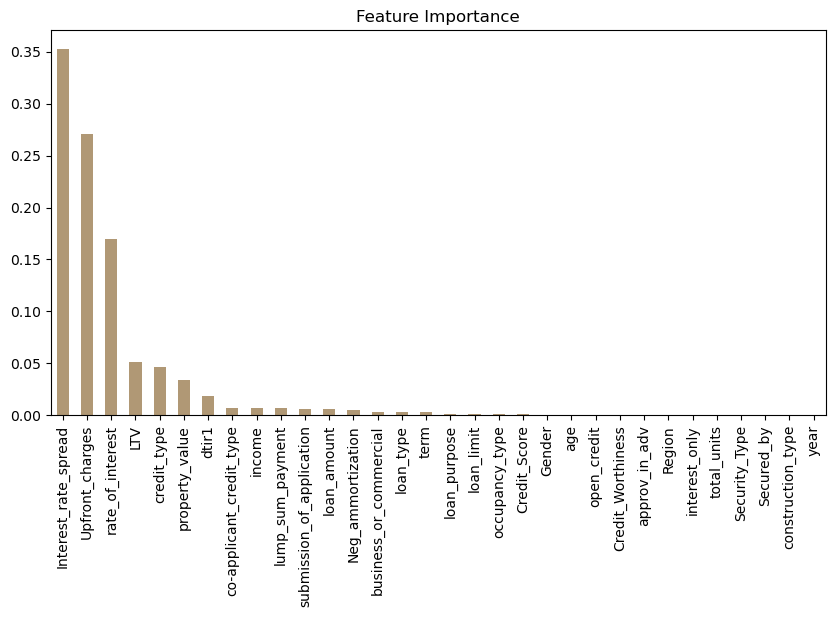

In [177]:
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', figsize=(10,5), title="Feature Importance", color="#b09875")
plt.show()

**Insight:** The Random Forest model highlights **Credit_Worthiness**, **loan_purpose**, and **interest_only** as the most impactful features driving loan default, helping lenders prioritize applicant evaluation based on these criteria.


## Insights from Machine Learning Models

- **Logistic Regression** gave a strong baseline performance and is interpretable.
- **Random Forest** achieved the best balance of accuracy and recall, making it suitable for predicting defaults.
- **Decision Tree** was fast and simple but slightly overfit.
- **Credit_Worthiness**, **loan_purpose**, and **interest_only** were the most important features driving predictions.

## Final Conclusion

This project successfully built a loan default prediction model using various machine learning techniques. After data cleaning, EDA, encoding, scaling, and training:
- **Random Forest** emerged as the best-performing model.
- The most influential factors were **Credit Worthiness**, **loan purpose**, and **loan structure (interest-only)**.
- The insights can assist financial institutions in identifying high-risk loan applicants more effectively.